# Agregación de datos por categoría

Generar un propio dataset dummy pero que incluya generación categórica. 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
gender=["Male", "Female"]
income=["Poor", "Middle Class", "Rich"]

In [3]:
#Generar dos colecciones de género y de ingresos
n=500 #500 datos 
gender_data=[]
income_data=[]
for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))


In [6]:
gender_data[1:10] #datos para Male y Female

['Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male']

In [7]:
income_data[1:10] #datos para ingresos

['Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Rich']

In [8]:
#estilizar datos N(m,s) -> m+s*Z para normal, se puede modificar para tener edades y alturas coherentes. 
height = 160 + 30* np.random.randn(n) #altura promedio 160 y desviación 30 
weight=65+25*np.random.randn(n) 
age=30*12*np.random.randn(n)
income=18000 + 3500*np.random.randn(n)


In [9]:
data=pd.DataFrame(
    {
        "Gender": gender_data, 
        "Economic Status": income_data,
        "Height": height, 
        "Weight": weight, 
        "Age": age, 
        "Income": income,
    }
)

In [12]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,150.527532,95.046002,422.908208,14805.624970
1,Male,Middle Class,145.832882,43.333650,-381.037629,16111.161994
2,Male,Poor,163.277147,94.684518,-115.251075,21894.113320
3,Male,Poor,176.308892,28.160609,-340.802339,17734.124039
4,Female,Middle Class,195.553607,48.776424,-4.553108,19851.266117


In [13]:
data.tail()

,Gender,Economic Status,Height,Weight,Age,Income
495,Male,Middle Class,171.224582,37.479313,-249.984295,16061.745893
496,Male,Poor,70.278418,71.405933,-309.140121,21171.627512
497,Female,Rich,160.218670,75.081480,-415.437178,13754.347615
498,Male,Middle Class,224.176510,79.016654,-321.810442,21059.639848
499,Female,Middle Class,162.623695,61.660936,-424.179211,17847.133907


## Agrupación de datos

In [16]:
grouped_gender=data.groupby("Gender") #se obtiene un objeto interno de pandas
#no rompe los datos, crea un objeto con nombre y grupo 

In [17]:
grouped_gender.groups #me indica a qué número indica male y female

{'Female': Int64Index([  0,   4,   6,   7,  12,  17,  18,  21,  22,  25,
             ...
             487, 488, 489, 490, 491, 492, 493, 494, 497, 499],
            dtype='int64', length=252),
 'Male': Int64Index([  1,   2,   3,   5,   8,   9,  10,  11,  13,  14,
             ...
             476, 477, 479, 481, 483, 484, 486, 495, 496, 498],
            dtype='int64', length=248)}

In [18]:
#se puede iterar sobre las funciones, si hay muchos grupos y se necesitan operaciones separadas. 


In [20]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight         Age        Income
0    Female            Rich  150.527532   95.046002  422.908208  14805.624970
4    Female    Middle Class  195.553607   48.776424   -4.553108  19851.266117
6    Female            Poor  158.198818   65.906159  420.897603  17921.841147
7    Female            Rich  166.810848    7.447512 -514.553508  17926.769525
12   Female            Poor  174.808306  102.674596  293.684845  17324.889001
..      ...             ...         ...         ...         ...           ...
492  Female            Rich  155.640141  100.664101   92.101299  15218.469453
493  Female            Rich  178.377844   26.218608  462.236172  15161.821196
494  Female    Middle Class  197.888675   89.184746  446.081760  23955.098104
497  Female            Rich  160.218670   75.081480 -415.437178  13754.347615
499  Female    Middle Class  162.623695   61.660936 -424.179211  17847.133907

[252 rows x 6 columns]
Male
    Gender Economic Status  

In [22]:
grouped_gender.get_group("Female") #solo me da el grupo de mujeres

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,150.527532,95.046002,422.908208,14805.624970
4,Female,Middle Class,195.553607,48.776424,-4.553108,19851.266117
6,Female,Poor,158.198818,65.906159,420.897603,17921.841147
7,Female,Rich,166.810848,7.447512,-514.553508,17926.769525
12,Female,Poor,174.808306,102.674596,293.684845,17324.889001
...,...,...,...,...,...,...
492,Female,Rich,155.640141,100.664101,92.101299,15218.469453
493,Female,Rich,178.377844,26.218608,462.236172,15161.821196
494,Female,Middle Class,197.888675,89.184746,446.081760,23955.098104
497,Female,Rich,160.218670,75.081480,-415.437178,13754.347615


Agrupación de más de una categoría

In [23]:
double_group = data.groupby(["Gender", "Economic Status"])

In [24]:
len(double_group)

6

In [25]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight         Age        Income
4    Female    Middle Class  195.553607   48.776424   -4.553108  19851.266117
22   Female    Middle Class  162.743592   81.718619 -122.787740  18534.764784
35   Female    Middle Class  116.221388   40.838518 -355.508077  20902.679277
36   Female    Middle Class  159.698977   49.545139 -349.236963  15490.782614
37   Female    Middle Class  188.314917   40.684776 -142.365286  17174.288319
..      ...             ...         ...         ...         ...           ...
487  Female    Middle Class  206.855736  100.384068  288.920919  19647.035599
488  Female    Middle Class  179.501134   80.978409  362.171213  15734.478091
490  Female    Middle Class  124.272941   54.286808  -36.933254  25427.158117
494  Female    Middle Class  197.888675   89.184746  446.081760  23955.098104
499  Female    Middle Class  162.623695   61.660936 -424.179211  17847.133907

[84 rows x 6 columns]
('Female', 'Po

# Operaciones de datos agrupados 

In [26]:
double_group.sum() #cuál de los datos generan más ingresos y así 

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13760.292317  5207.579201   544.592481  1.569248e+06
       Poor             13248.291148  5282.789281 -6056.731332  1.467462e+06
       Rich             13723.344798  5835.458307  3002.477919  1.533893e+06
Male   Middle Class     14348.140846  5872.816323 -1609.301750  1.604491e+06
       Poor             12161.574599  4779.465827 -5129.736405  1.430099e+06
       Rich             12596.543095  5245.978200  -141.850831  1.345860e+06

In [27]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     163.813004  61.994990   6.483244  18681.518375
       Poor             163.559150  65.219621 -74.774461  18116.816157
       Rich             157.739595  67.074233  34.511240  17630.948374
Male   Middle Class     159.423787  65.253515 -17.881131  17827.679569
       Poor             157.942527  62.070985 -66.619953  18572.712865
       Rich             155.512878  64.765163  -1.751245  16615.559860

In [29]:
double_group.size()

Gender  Economic Status
Female  Middle Class       84
        Poor               81
        Rich               87
Male    Middle Class       90
        Poor               77
        Rich               81
dtype: int64

In [30]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      84.0  163.813004  32.030670  69.239011  140.714713   
       Poor              81.0  163.559150  29.381720  81.299915  143.822543   
       Rich              87.0  157.739595  27.564129  68.039093  143.806505   
Male   Middle Class      90.0  159.423787  31.359288  83.821733  138.226247   
       Poor              77.0  157.942527  29.584445  70.278418  141.019997   
       Rich              81.0  155.512878  27.027378  87.268631  139.992053   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     163.905842  184.657523  226.629272   84.0  61.994990   
       Poor             164.483351  185.111729  215.439362   81.0  65.219621   
       Rich             154.666697  171.106436  226.314153   87.0  67.074233   
Male   Middle Class     158.566871  179.643286  238.854144   90.0  65.253515   
       Poor             159.692020  179.666683  220.873594   77.0  62.070985   
       Rich             156.256322  173.412920  206.825777   81.0  64.765163   

                        ...         Age              Income                \
                        ...         75%          max  count          mean   
Gender Economic Status  ...                                                 
Female Middle Class     ...  246.616167   925.660131   84.0  18681.518375   
       Poor             ...  174.907314   655.725188   81.0  18116.816157   
       Rich             ...  240.382871   947.036178   87.0  17630.948374   
Male   Middle Class     ...  240.564425   923.164319   90.0  17827.679569   
       Poor             ...  164.750562   700.930671   77.0  18572.712865   
       Rich             ...  197.476667  1135.931609   81.0  16615.559860   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3715.375727   8940.987280  15939.851480  18799.900309   
       Poor             3958.827655   6422.533575  15466.551868  18282.873384   
       Rich             3613.278165  11004.864527  14755.109854  17832.143745   
Male   Middle Class     3395.375468   9713.648726  15819.419033  17910.627120   
       Poor             3427.691467   8824.072523  16270.739273  18961.972166   
       Rich             3368.827258  10090.499541  14349.623784  16767.061304   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     21365.519665  27215.734887  
       Poor             20659.717461  28763.527069  
       Rich             20046.088164  29810.958198  
Male   Middle Class     19871.555814  26408.906392  
       Poor             20925.196781  27186.695237  
       Rich             18360.815587  24989.752639  

[6 rows x 32 columns]

In [31]:
grouped_income=double_group["Income"]

In [32]:
grouped_income.describe() #función agregación

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      84.0  18681.518375  3715.375727   8940.987280   
       Poor              81.0  18116.816157  3958.827655   6422.533575   
       Rich              87.0  17630.948374  3613.278165  11004.864527   
Male   Middle Class      90.0  17827.679569  3395.375468   9713.648726   
       Poor              77.0  18572.712865  3427.691467   8824.072523   
       Rich              81.0  16615.559860  3368.827258  10090.499541   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15939.851480  18799.900309  21365.519665  27215.734887  
       Poor             15466.551868  18282.873384  20659.717461  28763.527069  
       Rich             14755.109854  17832.143745  20046.088164  29810.958198  
Male   Middle Class     15819.419033  17910.627120  19871.555814  26408.906392  
       Poor             16270.739273  18961.972166  20925.196781  27186.695237  
       Rich             14349.623784  16767.061304  18360.815587  24989.752639

In [34]:
double_group.aggregate(
    {
        "Income": np.sum, 
        "Age": np.mean,
        "Height": np.std
    }
) #tomar el agregado desde otro punto de vista 

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.569248e+06   6.483244  32.030670
       Poor             1.467462e+06 -74.774461  29.381720
       Rich             1.533893e+06  34.511240  27.564129
Male   Middle Class     1.604491e+06 -17.881131  31.359288
       Poor             1.430099e+06 -66.619953  29.584445
       Rich             1.345860e+06  -1.751245  27.027378

In [37]:
#queremos la tipificación de la edad 
double_group.aggregate(
    {
    "Age": np.mean, 
    "Height": lambda h: np.mean(h)/np.std(h) 
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class      6.483244  5.144971
       Poor            -74.774461  5.601381
       Rich             34.511240  5.755815
Male   Middle Class    -17.881131  5.112263
       Poor            -66.619953  5.373710
       Rich             -1.751245  5.789752

In [38]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13760.292317  163.813004  32.030670  5207.579201   
       Poor             13248.291148  163.559150  29.381720  5282.789281   
       Rich             13723.344798  157.739595  27.564129  5835.458307   
Male   Middle Class     14348.140846  159.423787  31.359288  5872.816323   
       Poor             12161.574599  157.942527  29.584445  4779.465827   
       Rich             12596.543095  155.512878  27.027378  5245.978200   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     61.994990  26.941369   544.592481   6.483244   
       Poor             65.219621  21.292797 -6056.731332 -74.774461   
       Rich             67.074233  24.117772  3002.477919  34.511240   
Male   Middle Class     65.253515  22.812163 -1609.301750 -17.881131   
       Poor             62.070985  26.249384 -5129.736405 -66.619953   
       Rich             64.765163  25.824845  -141.850831  -1.751245   

                                          Income                             
                               std           sum          mean          std  
Gender Economic Status                                                       
Female Middle Class     350.135362  1.569248e+06  18681.518375  3715.375727  
       Poor             362.149382  1.467462e+06  18116.816157  3958.827655  
       Rich             317.390864  1.533893e+06  17630.948374  3613.278165  
Male   Middle Class     343.834915  1.604491e+06  17827.679569  3395.375468  
       Poor             328.799971  1.430099e+06  18572.712865  3427.691467  
       Rich             352.694745  1.345860e+06  16615.559860  3368.827258

In [39]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.144971  2.314928  0.018628  5.058363
       Poor             5.601381  3.082074 -0.207761  4.604821
       Rich             5.755815  2.797235  0.109365  4.907775
Male   Middle Class     5.112263  2.876496 -0.052296  5.279992
       Poor             5.373710  2.380171 -0.203944  5.453963
       Rich             5.789752  2.523488 -0.004996  4.962880

# Filtrado de datos

In [40]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13760.292317  5207.579201   544.592481  1.569248e+06
       Poor             13248.291148  5282.789281 -6056.731332  1.467462e+06
       Rich             13723.344798  5835.458307  3002.477919  1.533893e+06
Male   Middle Class     14348.140846  5872.816323 -1609.301750  1.604491e+06
       Poor             12161.574599  4779.465827 -5129.736405  1.430099e+06
       Rich             12596.543095  5245.978200  -141.850831  1.345860e+06

In [46]:
double_group["Age"].filter(lambda x: x.sum()>600)

0      422.908208
7     -514.553508
25     279.205048
31     -43.587764
39    -345.247905
          ...    
489   -164.987625
491   -254.352541
492     92.101299
493    462.236172
497   -415.437178
Name: Age, Length: 87, dtype: float64

# Transformación de variables

In [48]:
zscore= lambda x: (x-x.mean())/x.std() 

In [51]:
z_group=double_group.transform(zscore) #a la columna le resto el promedio y la divido por la desviación estándar

In [52]:
import matplotlib.pyplot as plt 


(array([  3.,  20.,  46., 104., 117., 102.,  67.,  26.,  11.,   4.]),
 array([-2.87595831, -2.26579378, -1.65562925, -1.04546472, -0.43530019,
         0.17486434,  0.78502888,  1.39519341,  2.00535794,  2.61552247,
         3.225687  ]),
 <a list of 10 Patch objects>)

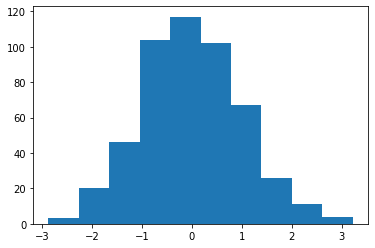

In [53]:
plt.hist(z_group["Age"])

In [54]:
#rellenar los valores con lambda
fill_na_mean= lambda x: x.fillna(x.mean())

In [56]:
# reemplaza na por promedio 
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,150.527532,95.046002,422.908208,14805.624970
1,145.832882,43.333650,-381.037629,16111.161994
2,163.277147,94.684518,-115.251075,21894.113320
3,176.308892,28.160609,-340.802339,17734.124039
4,195.553607,48.776424,-4.553108,19851.266117
...,...,...,...,...
495,171.224582,37.479313,-249.984295,16061.745893
496,70.278418,71.405933,-309.140121,21171.627512
497,160.218670,75.081480,-415.437178,13754.347615
498,224.176510,79.016654,-321.810442,21059.639848


Lambda con transform son operaciones muy útiles

# Operaciones diversas muy útiles. 

In [58]:
double_group.head(1) #primera fila de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,150.527532,95.046002,422.908208,14805.624970
1,Male,Middle Class,145.832882,43.333650,-381.037629,16111.161994
2,Male,Poor,163.277147,94.684518,-115.251075,21894.113320
4,Female,Middle Class,195.553607,48.776424,-4.553108,19851.266117
6,Female,Poor,158.198818,65.906159,420.897603,17921.841147
9,Male,Rich,166.421698,53.361827,-186.174559,16945.755545


In [60]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
483,Male,Rich,149.661005,38.333035,7.632804,17250.152529
485,Female,Poor,108.029919,30.912401,-782.555755,9795.719684
496,Male,Poor,70.278418,71.405933,-309.140121,21171.627512
497,Female,Rich,160.218670,75.081480,-415.437178,13754.347615
498,Male,Middle Class,224.176510,79.016654,-321.810442,21059.639848
499,Female,Middle Class,162.623695,61.660936,-424.179211,17847.133907


In [62]:
#fila enésima , elemento 32 de cada una de las filas. 
#lo devuelve como tabla agrupada 
double_group.nth(32)

Height     Weight         Age        Income
Gender Economic Status                                                 
Female Middle Class     141.626256  74.484756 -424.004226  21494.965023
       Poor             209.836824  66.548119  114.052596  14556.657306
       Rich             199.537826  90.198502  331.979001  16623.566670
Male   Middle Class     178.829647  78.184762 -641.312567  14448.179639
       Poor             140.203492  44.172828 -221.723105  20875.947993
       Rich             147.654371  41.468135  173.159639  10814.484391

In [64]:
double_group.nth(82)
#no hay 82 mujeres pobres 

Height     Weight         Age        Income
Gender Economic Status                                                 
Female Middle Class     197.888675  89.184746  446.081760  23955.098104
       Rich             132.105946  92.428536 -164.987625  19547.905745
Male   Middle Class     197.262167  90.880773  -70.688900  22327.914594

In [65]:
#personas más jovenes 
data_sorted=data.sort_values(["Age", "Income"])

In [66]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
185,Female,Poor,156.161730,53.494688,-1116.300986,18561.599505
199,Female,Poor,109.102308,63.928636,-853.946847,14681.162299
448,Male,Middle Class,217.172410,42.327969,-851.343115,9973.670528
28,Male,Poor,119.625314,73.176105,-836.169928,16095.756109
103,Male,Rich,127.733537,87.789701,-798.503519,14832.521973
282,Male,Poor,193.975943,85.841831,-784.144704,18424.347428
485,Female,Poor,108.029919,30.912401,-782.555755,9795.719684
152,Male,Rich,146.396032,35.195198,-766.556416,21179.723283
419,Male,Middle Class,160.597901,48.103079,-766.123764,19070.838621
72,Male,Poor,161.289047,54.304011,-704.757301,22794.097598


In [67]:
age_grouped =data_sorted.groupby("Gender")

In [70]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
185,Female,Poor,156.161730,53.494688,-1116.300986,18561.599505
199,Female,Poor,109.102308,63.928636,-853.946847,14681.162299
448,Male,Middle Class,217.172410,42.327969,-851.343115,9973.670528
28,Male,Poor,119.625314,73.176105,-836.169928,16095.756109
103,Male,Rich,127.733537,87.789701,-798.503519,14832.521973
282,Male,Poor,193.975943,85.841831,-784.144704,18424.347428
485,Female,Poor,108.029919,30.912401,-782.555755,9795.719684
152,Male,Rich,146.396032,35.195198,-766.556416,21179.723283
319,Female,Middle Class,158.250836,47.514980,-690.426330,19160.047248
158,Female,Middle Class,149.452630,72.083950,-682.621257,13137.278244


In [71]:
age_grouped.head(1) #hombre y mujer más joven

,Gender,Economic Status,Height,Weight,Age,Income
185,Female,Poor,156.16173,53.494688,-1116.300986,18561.599505
448,Male,Middle Class,217.17241,42.327969,-851.343115,9973.670528


In [72]:
age_grouped.tail(1) #más viejos 

,Gender,Economic Status,Height,Weight,Age,Income
259,Female,Rich,151.563185,71.734867,947.036178,20251.467761
395,Male,Rich,134.562976,65.436851,1135.931609,14349.623784
